## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
languages_data = pd.read_csv("QueryResults.csv")
col_names = {"m" : "date", "TagName" : "tag_name", "Unnamed: 2" : "counts"}
languages_data.rename(columns=col_names, inplace=True)
languages_data.head()

,date,tag_name,counts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
languages_data.tail()

,date,tag_name,counts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


Looking at the data we can see that the data is sorted according to the date the language was tagged in a query, also the data is ranging from 2008 to 2020.

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
languages_data.shape

(1991, 3)

The dataset has 1991 rows and 3 columns.

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
languages_data.count()

date        1991
tag_name    1991
counts      1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
languages_data.groupby("tag_name").sum("counts").sort_values(by="counts", ascending=False)

,counts
tag_name,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Javascript has the highest post count of all time, followed by java and python. Go, delphi and assembly have the lowest number of posts. 

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
languages_data.groupby('tag_name').count().sort_values(by="counts", ascending=False)

,date,counts
tag_name,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


R, Swift and Go have the lease number of posts suggesting that they have missing data in certain months, which makes sense because swift and go were developed later. R also has missing values even though it was developed earlier in 1993.

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
languages_data["date"] = pd.to_datetime(languages_data['date'])
languages_data.head()

,date,tag_name,counts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [9]:
reshaped_languages = languages_data.pivot(index = "date", columns = "tag_name", values='counts')
reshaped_languages.fillna(0, inplace= True)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [10]:
print(reshaped_languages.shape)
print(reshaped_languages.columns)

(145, 14)
Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='tag_name')


In [11]:
reshaped_languages.head()

tag_name,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


The reshaped dataset has 145 rows and 14 columns. This is because c# has the maximum value count when grouped by languages equivalent to 145. The number of columns are 14 because that's the number of languages we are analyzing. 

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [12]:
reshaped_languages.count()

tag_name
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

The number of entries is now the same for every language because while pivoting, if a language didn't have any tags in a particular month, it was automatically assigned to NaN, these values were later converted to 0. So now, each row and column has a value and hence the counts for all languages are the same.

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

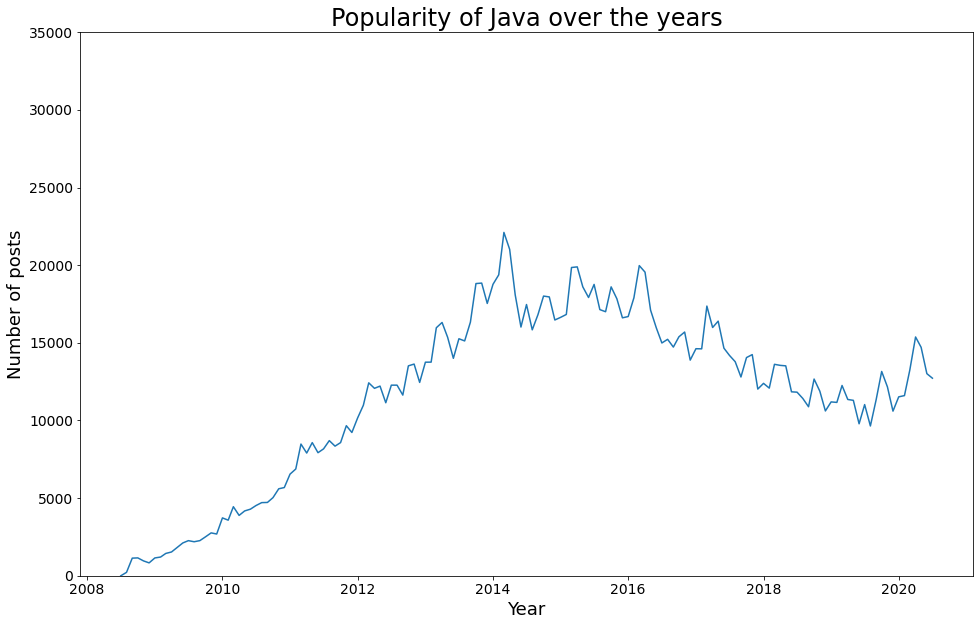

In [13]:
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
plt.plot(reshaped_languages.index, reshaped_languages['java'])
plt.title("Popularity of Java over the years", fontsize = 24)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of posts", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Java seems to have consistantly climbed in popularity till 2014 where it peaked and stayed stagnant till 2016. Java's popularity has fallen slightly since then.

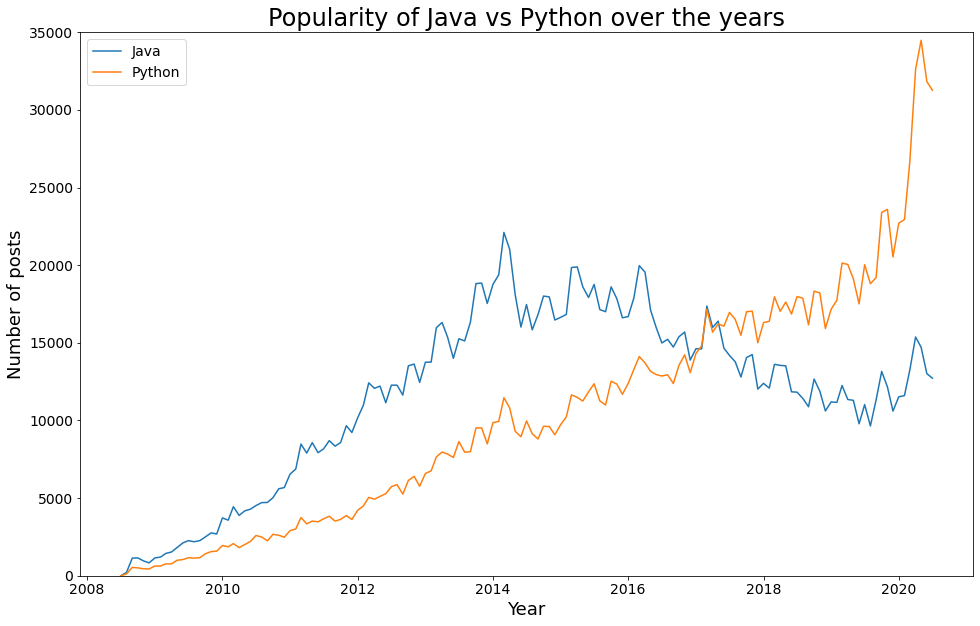

In [23]:
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
plt.plot(reshaped_languages.index, reshaped_languages['java'], label = "Java")
plt.plot(reshaped_languages.index, reshaped_languages['python'], label = "Python")
plt.title("Popularity of Java vs Python over the years", fontsize = 24)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of posts", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize=14) 
plt.show()

Upon more investigation, after comparing the popularity of Python with Java we can see that Python has consistantly climbed in popularity. Python finally overtook Java in popularity in 2017, perhaps that's when Python became mainstream. 

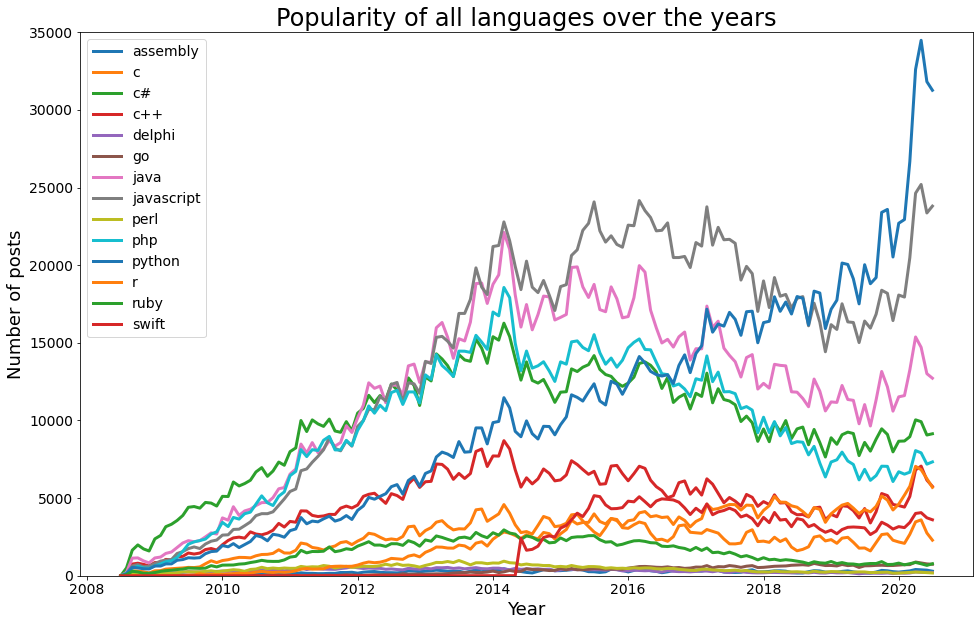

In [20]:
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
plt.title("Popularity of all languages over the years", fontsize = 24)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of posts", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
for i in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, reshaped_languages[i], linewidth = 3, label=reshaped_languages[i].name)
plt.legend(fontsize=14) 
plt.show()

When we look at all the languages together, we can see that Python, JavaScript and Java are the three most popular languages. Another interesting comparison is for C# and PHP which have a near similar trends. 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

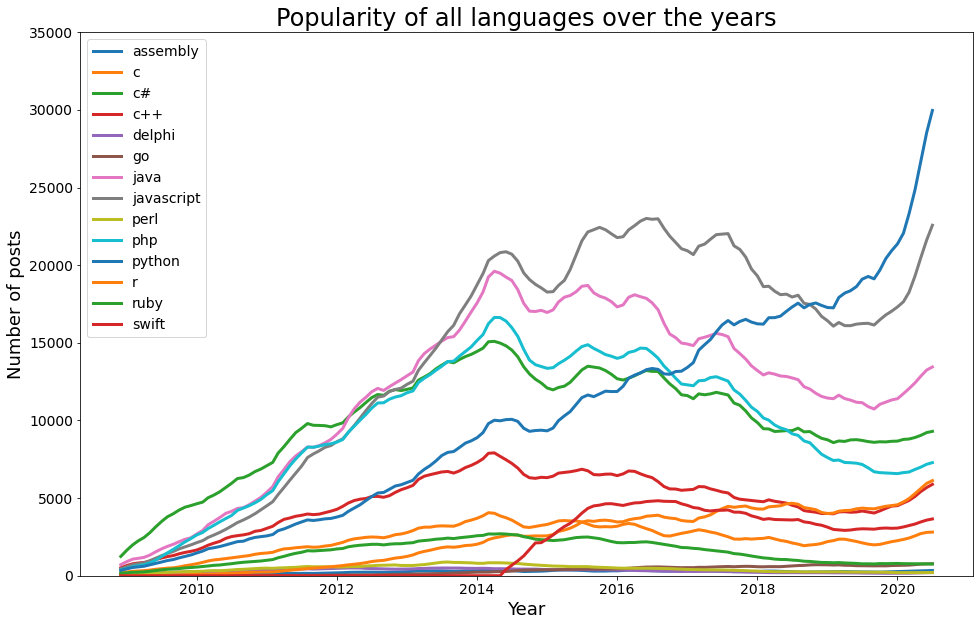

In [21]:
roll_df = reshaped_languages.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
plt.title("Popularity of all languages over the years", fontsize = 24)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of posts", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
for i in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, roll_df[i], linewidth = 3, label=roll_df[i].name)
plt.legend(fontsize=14) 
plt.show()

When we see a smoothened version of the trends, the observations above are even more obvious. 

<h4> Trying different rolling windows to observe differences</h4>

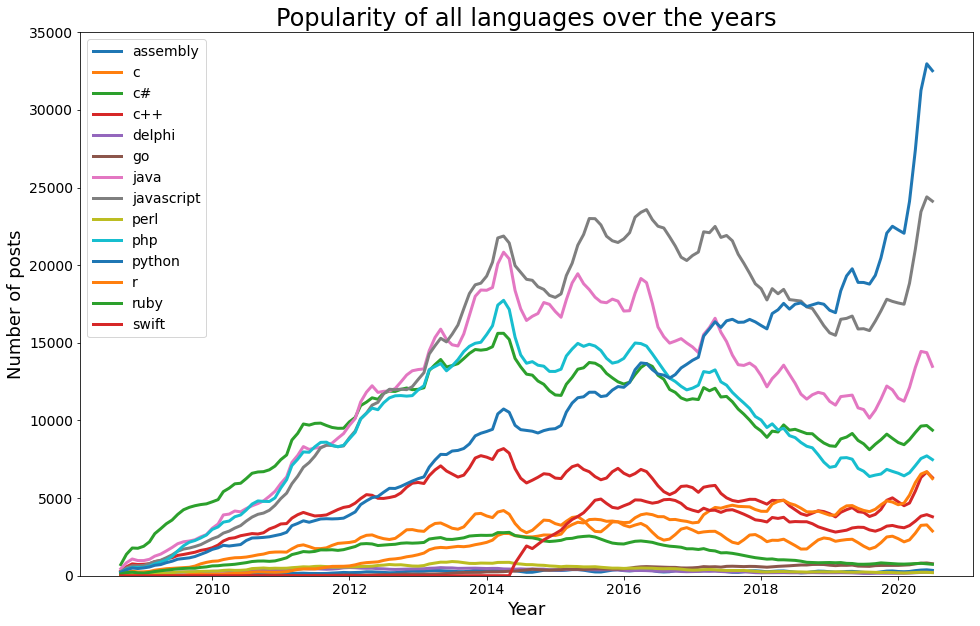

In [22]:
roll_df = reshaped_languages.rolling(window=3).mean()
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
plt.title("Popularity of all languages over the years", fontsize = 24)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of posts", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
for i in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, roll_df[i], linewidth = 3, label=roll_df[i].name)
plt.legend(fontsize=14) 
plt.show()

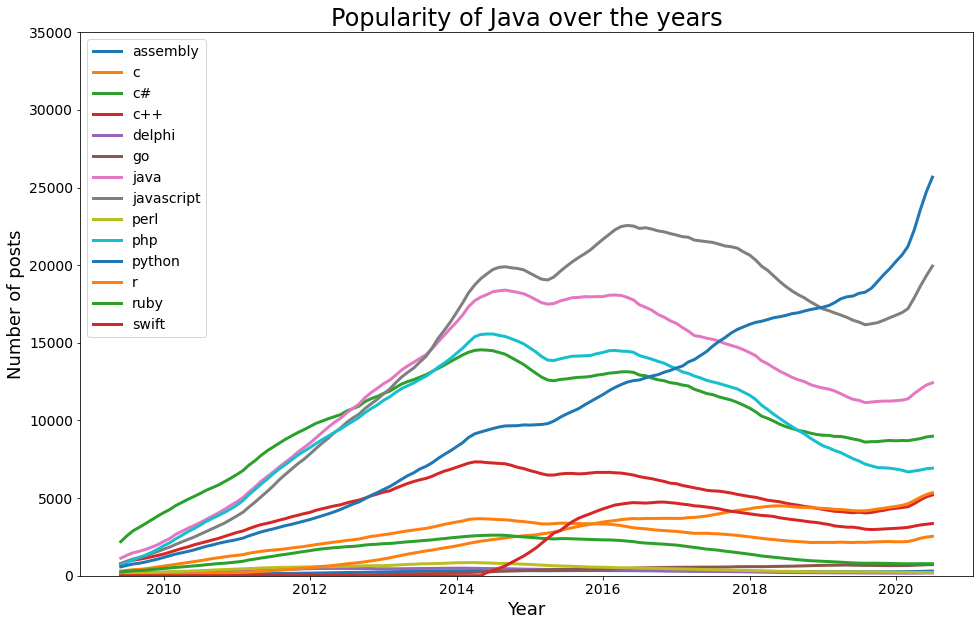

In [18]:
roll_df = reshaped_languages.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
plt.title("Popularity of all languages over the years", fontsize = 24)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of posts", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
for i in reshaped_languages.columns:
    plt.plot(reshaped_languages.index, roll_df[i], linewidth = 3, label=roll_df[i].name)
plt.legend(fontsize=14) 
plt.show()

A window of 6 values seems to the right value for this data. Window of 3 still shows too many ups and downs and window of 12 seems to be losing the proper trend as its too smooth.